<a href="https://www.kaggle.com/code/subramanyashenoy/spaceship-titanic-regression?scriptVersionId=142555136" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/spaceship-titanic/sample_submission.csv
/kaggle/input/spaceship-titanic/train.csv
/kaggle/input/spaceship-titanic/test.csv


# 🛸 Spaceship Titanic 🛸 #
**Predict which passengers are transported to an alternate dimension 👽 **

# 🔶 Look at the big Picture

**🔸 Frame the problem**
* 🟢 Goal: True/ False to decide if a person has been transported to an alternate dimension
* 🟢 End Result: Boolean True/False 🗒
* 🟢 Problem Type: Regression
* 🟢 Learning Type: Supervised Learning
* 🟢 Variate: Univariate (need to predict only 1 target)
* 🟢 Features: Multiple features

**🔸 Select performance measure:**
* 🟢 using Mean Absolute Error (MAE) 🗒 . This was given in the problem set. This also means there might be chances of high outliers.

**🔸 Assumptions: none**

# 🔶Get the Data

* 🟢 Get the kagle.json file into local
* 🟢 Read the train set and test set store it in Pandas dataFrame

# 🔸 Take Quick look
* 🟢 .head() to see the index columns and quick look at the data
* 🟢 .shape to see the size of training set
* 🟢 .info() to see the data types and missing values
* 🟢 .value_counts() on categorical data to check if all the categories are equaly represented and to check the weightages.
* 🟢 .describe() to check mean and std deviation, min, max this gives a hint of how data is distributed and what is the max values, min values and is there any scaled data or not.
* 🟢 Checking correlation matrix

# 🔸 Visualize the data
* 🟢 .hist() to see the distribution of data and if any outliers, tail heavy etc.

# 🔸 Observation

〰〰〰〰〰〰〰〰〰〰〰〰〰〰〰〰〰〰〰〰〰〰〰〰〰〰〰〰〰〰〰〰

* 👁 There are ~9K rows and 13 Columns

* 👁 We have 6 categorical, 6 numerical columns

* 👁 Has a index column PassengerId

* 👁 Distribution of data: 
** HomePlanet: 4.6: 2.1: 1.7 ratio
** CryoSleep: this representation strata should be well split (5: 1 ratio is what is see)
** Destination: 3 unique values
* 👁 We Need to predict the "Transported" Column

〰〰〰〰〰〰〰〰〰〰〰〰〰〰〰〰〰〰〰〰〰〰〰〰〰〰〰〰〰〰〰〰

In [2]:
import pandas as pd

train = pd.read_csv('/kaggle/input/spaceship-titanic/train.csv', index_col = 'PassengerId')
test = pd.read_csv('/kaggle/input/spaceship-titanic/test.csv', index_col = 'PassengerId')

In [3]:
train.shape

(8693, 13)

In [4]:
train.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
PassengerId,,,,,,,,,,,,,
0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8693 entries, 0001_01 to 9280_02
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    8492 non-null   object 
 1   CryoSleep     8476 non-null   object 
 2   Cabin         8494 non-null   object 
 3   Destination   8511 non-null   object 
 4   Age           8514 non-null   float64
 5   VIP           8490 non-null   object 
 6   RoomService   8512 non-null   float64
 7   FoodCourt     8510 non-null   float64
 8   ShoppingMall  8485 non-null   float64
 9   Spa           8510 non-null   float64
 10  VRDeck        8505 non-null   float64
 11  Name          8493 non-null   object 
 12  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(6)
memory usage: 891.4+ KB


In [6]:
train.describe() 

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [7]:
import matplotlib.pyplot as plt

# This is used to viualize the data distribution and scale
print(train.columns)

Index(['HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age', 'VIP',
       'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Name',
       'Transported'],
      dtype='object')


# 🔸 Observation - HomePlanet

〰〰〰〰〰〰〰〰〰〰〰〰〰〰〰〰〰〰〰〰〰〰〰〰〰〰〰〰〰〰〰〰

* 👁 We have 3 categorical values.

* 👁 1 'Name' column can be removed

* 👁 2 'CryoSleep' is boolen, fill NA with False and 1Hotencoding needed

* 👁 3 'Cabin' needs numbered coded.

* 👁 4 'Destination' there are 3 options, Hotencoding needed

* 👁 5 'Age' can be stratified. and grouped, then 1Hotencoding needed

* 👁 6 'VIP' is boolen, fill NA with False and 1Hotencoding needed

* 👁 7 'RoomService' needs scaling

* 👁 8 'FoodCourt' needs scaling

* 👁 9 'ShoppingMall' scaling requiered

* 👁 10 'Spa' scaling requiered

* 👁 11 'VRDeck' scaling requiered

〰〰〰〰〰〰〰〰〰〰〰〰〰〰〰〰〰〰〰〰〰〰〰〰〰〰〰〰〰〰〰〰

In [8]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(train, test_size=0.2, random_state=42)

In [9]:
train_set_label = train_set.copy()
train_set_label.drop(columns=['Transported'], inplace=True)
train_set_target = train_set['Transported'].astype(int)

In [10]:
test_set_label = test_set.copy()
test_set_label.drop(columns=['Transported'], inplace=True)
test_set_target = test_set['Transported'].astype(int)

# 🔶 Prepare the Data for ML
#  🔸 Preliminary Steps
* 🟢 Creating common Functions for operations
* 🟢 Make a copy of training set and seperate category and label

In [11]:
# Building a Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline, make_pipeline

cat_features = ['CryoSleep', 'Destination', 'VIP', 'HomePlanet']
ordinal_encoder = ['Cabin', 'Age']
name_col = ['Name']
scaling_features = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']

name_tranform = Pipeline(steps=[
    ('name drop',  SimpleImputer(strategy='most_frequent')),
    ('ordinal_encoder3', OrdinalEncoder())
])

    
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('ordinal_encoder1', OrdinalEncoder())
])

cat_tranformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('ordinal_encoder1', OneHotEncoder(sparse=False))
])

numeric_column_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('ordinal_encoder2', StandardScaler())
])

preprocessing = ColumnTransformer(
        [
            ("name column removal", name_tranform, name_col),
            ("categorical Column", cat_tranformer, cat_features),
            ("scaling Features", numeric_column_transformer, scaling_features),
            ("Ordinal encoding", categorical_transformer, ordinal_encoder)
        ],
        remainder='passthrough' )


In [12]:
def process_df(df):
    processed_df = preprocessing.fit_transform(df)
    columns_list = preprocessing.get_feature_names_out()
    df_transformed = pd.DataFrame(processed_df, columns=columns_list)
    df_transformed.index.name = 'PassengerId'
    return df_transformed

# 🔶 Select and Train Model
## 🔸 Select Model
- 🥇 Try to use available models to gauge every models performance (LinearRegresor, Decision Tree, Random Forest)
- 🥇 Check each models performance with the our Performance measure we decided previously (train_set_label, train_set_target and predict the test_set without target and then compare prediction with target)

## 🦾 Linear Regression 


In [13]:
# Linear Regression Model
from sklearn.linear_model import LinearRegression

lr_model = make_pipeline(preprocessing, LinearRegression())
lr_model.fit(train_set_label, train_set_target)

/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('name column removal',
                                                  Pipeline(steps=[('name drop',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ordinal_encoder3',
                                                                   OrdinalEncoder())]),
                                                  ['Name']),
                                                 ('categorical Column',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ordinal_encoder1',
                                                                   OneHotEn...
                                                 ('scaling Features',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('ordinal_encoder2',
                                                                   StandardScaler())]),
                                                  ['RoomService', 'FoodCourt',
                                                   'ShoppingMall', 'Spa',
                                                   'VRDeck']),
                                                 ('Ordinal encoding',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ordinal_encoder1',
                                                                   OrdinalEncoder())]),
                                                  ['Cabin', 'Age'])])),
                ('linearregression', LinearRegression())])

In [14]:
test_set_label_copy = test_set_label.copy()
process_df(test_set_label_copy)
lr_prediction = lr_model.predict(test_set_label_copy)

/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


(array([  3.,   8.,  17.,  92., 725., 250., 467., 173.,   1.,   3.]),
 array([-0.87465611, -0.61702801, -0.35939992, -0.10177182,  0.15585628,
         0.41348438,  0.67111248,  0.92874058,  1.18636867,  1.44399677,
         1.70162487]),
 <BarContainer object of 10 artists>)

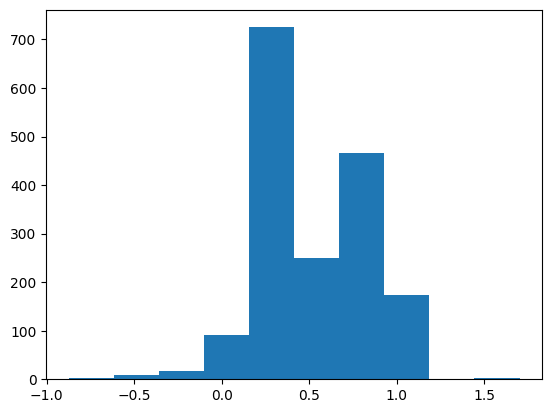

In [15]:
plt.hist(lr_prediction)

In [16]:
from sklearn.metrics import mean_squared_error

lr_model_rmse = mean_squared_error(test_set_target, lr_prediction, squared=False)
lr_model_rmse

0.40504270451833446

In [17]:
#Checking the same with Decision Tree regressor
from sklearn.tree import DecisionTreeRegressor

dt_model = make_pipeline(preprocessing, DecisionTreeRegressor(random_state=42))
dt_model.fit(train_set_label, train_set_target)

/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('name column removal',
                                                  Pipeline(steps=[('name drop',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ordinal_encoder3',
                                                                   OrdinalEncoder())]),
                                                  ['Name']),
                                                 ('categorical Column',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ordinal_encoder1',
                                                                   OneHotEn...
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('ordinal_encoder2',
                                                                   StandardScaler())]),
                                                  ['RoomService', 'FoodCourt',
                                                   'ShoppingMall', 'Spa',
                                                   'VRDeck']),
                                                 ('Ordinal encoding',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ordinal_encoder1',
                                                                   OrdinalEncoder())]),
                                                  ['Cabin', 'Age'])])),
                ('decisiontreeregressor',
                 DecisionTreeRegressor(random_state=42))])

In [18]:
test_set_label_copy = test_set_label.copy()
process_df(test_set_label_copy)
dt_prediction = dt_model.predict(test_set_label_copy)

/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [19]:
dt_model_rmse = mean_squared_error(test_set_target, dt_prediction, squared=False)
dt_model_rmse

0.539418040935522

In [20]:
from sklearn.ensemble import RandomForestRegressor

rf_model = make_pipeline(preprocessing, RandomForestRegressor(random_state=42))
rf_model.fit(train_set_label, train_set_target)

/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('name column removal',
                                                  Pipeline(steps=[('name drop',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ordinal_encoder3',
                                                                   OrdinalEncoder())]),
                                                  ['Name']),
                                                 ('categorical Column',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ordinal_encoder1',
                                                                   OneHotEn...
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('ordinal_encoder2',
                                                                   StandardScaler())]),
                                                  ['RoomService', 'FoodCourt',
                                                   'ShoppingMall', 'Spa',
                                                   'VRDeck']),
                                                 ('Ordinal encoding',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ordinal_encoder1',
                                                                   OrdinalEncoder())]),
                                                  ['Cabin', 'Age'])])),
                ('randomforestregressor',
                 RandomForestRegressor(random_state=42))])

In [21]:
test_set_label_copy = test_set_label.copy()
process_df(test_set_label_copy)
rf_model_predict = rf_model.predict(test_set_label_copy)

/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [22]:
rf_model_rmse = mean_squared_error(test_set_target, rf_model_predict, squared=False)
rf_model_rmse

0.3978855123852494

# Picking Random Forest model for submission 

In [23]:
test_copy = test.copy()
process_df(test_copy)
rf_model_predict = rf_model.predict(test_copy)

/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [24]:
submission = pd.DataFrame(rf_model_predict, columns=['Transported'])
submission['Transported'] = submission['Transported'].astype(int)
submission

,Transported
0,0
1,0
2,1
3,0
4,0
...,...
4272,0
4273,0
4274,1
4275,0
